In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
accidents = pd.read_csv('datasets/dft-road-casualty-statistics-accident-2020.csv')
casualty = pd.read_csv('datasets/dft-road-casualty-statistics-casualty-2020.csv')
vehicles = pd.read_csv('datasets/dft-road-casualty-statistics-vehicle-2020.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
accidents_casualty = pd.merge(accidents, casualty, on='accident_index')
ac = pd.merge(accidents_casualty, vehicles, on=['accident_index', 'vehicle_reference'])

In [44]:
pd.set_option('display.max_columns', None)
ac.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year_y,accident_reference_y,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,accident_year,accident_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20,E09000008,E09000008,5,0,6,20,0,-1,6,0,0,0,4,1,2,0,0,1,1,2,E01000994,2020,010278554,2,1,1,1,23,5,2,0,0,0,0,0,3,-1,-1,2020,010278554,3,0,6,7,7,0,0,0,0,0,0,3,1,6,1,23,5,113,1,4,SUZUKI UK 110,-1,-1
1,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2,E09000007,E09000007,5,0,6,30,3,4,6,0,9,9,1,1,9,0,0,1,3,2,E01000927,2020,010278556,1,1,1,1,17,4,2,0,0,0,0,0,3,1,1,2020,010278556,3,0,99,9,9,99,9,9,99,9,99,9,1,6,1,17,4,125,1,4,HONDA CBR125R,1,1
2,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,1,09/11/2020,2,19:31,8,E09000028,E09000028,3,200,2,20,3,2,5,0,0,5,4,1,2,0,0,1,1,2,E01004022,2020,010278558,1,1,1,1,45,7,3,0,0,0,0,0,3,1,3,2020,010278558,3,0,15,3,7,0,2,0,0,0,0,2,1,1,1,45,7,125,1,0,YAMAHA GPD 125,3,1
3,2020010278559,2020,010278559,530354.0,172580.0,-0.125965,51.437228,1,3,2,1,09/11/2020,2,19:13,9,E09000022,E09000022,5,0,6,30,0,-1,6,0,0,5,4,1,2,0,0,1,1,2,E01003151,2020,010278559,1,1,1,1,45,7,3,0,0,0,0,0,3,1,6,2020,010278559,3,0,18,4,8,0,0,0,0,0,0,4,1,6,1,45,7,124,1,7,-1,6,1
4,2020010278561,2020,010278561,534946.0,184874.0,-0.055243,51.546633,1,2,1,1,09/11/2020,2,18:03,4,E09000012,E09000012,6,0,6,20,3,2,6,0,0,5,4,8,2,0,0,1,1,2,E01001762,2020,010278561,1,1,3,1,42,7,2,1,1,0,0,0,0,1,2,2020,010278561,11,0,7,5,7,0,2,0,0,0,0,4,1,1,1,52,8,6700,2,2,ALEXANDER DENNIS MODEL MISSING,3,1


In [45]:
drop = ['accident_year_x',
 'accident_reference_x',
 'police_force',
 'accident_severity',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_number',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'did_police_officer_attend_scene_of_accident',
 'lsoa_of_accident_location',
 'accident_year_y',
 'accident_reference_y',
 'vehicle_reference',
 'casualty_reference',
 'age_of_casualty',
 'pedestrian_location',
 'pedestrian_movement',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'accident_year',
 'accident_reference',
 'vehicle_type',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'age_of_driver',
 'generic_make_model']

ac = ac.drop(columns=drop)

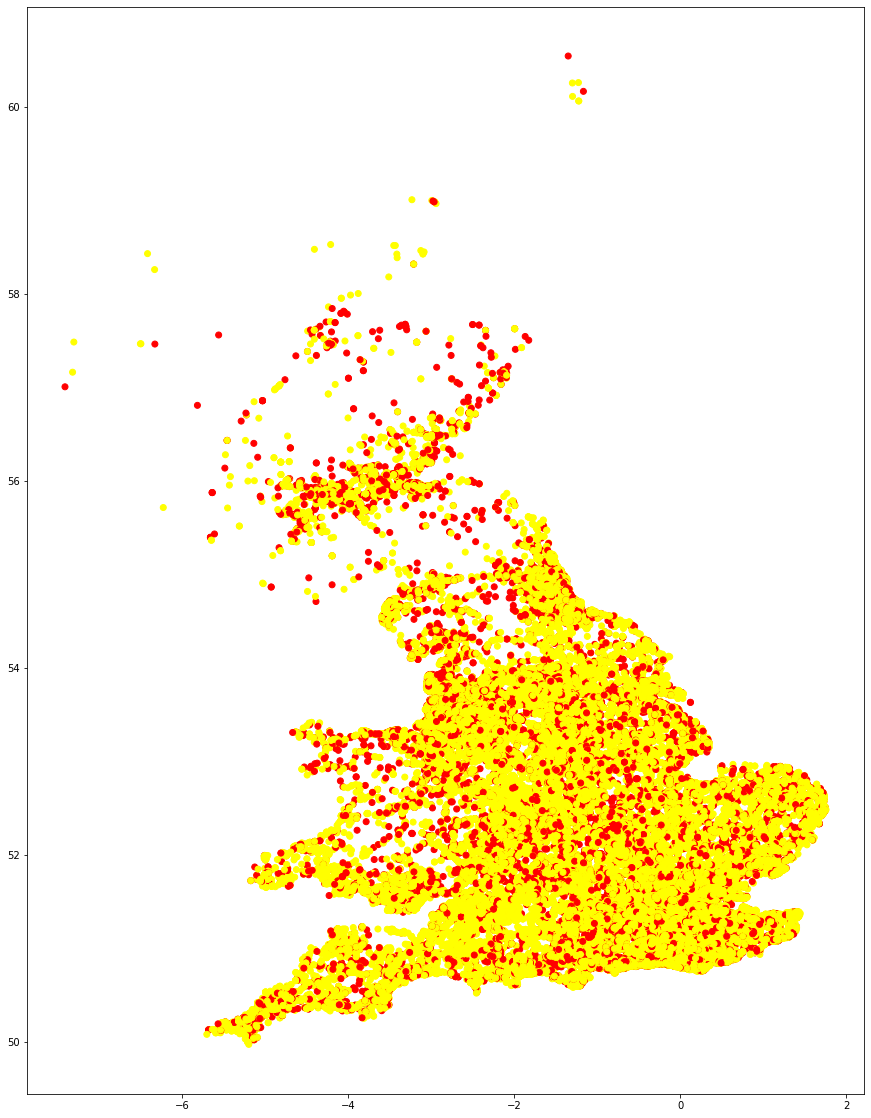

In [46]:
#Plot accidents
colors = ["red" if i<=2 else 'yellow' for i in ac['casualty_severity']]
plt.figure(figsize=(15,20))
plt.scatter(ac['longitude'], ac['latitude'], color = colors) #['latitude'], color = colors)

In [47]:
times = ac['time'].str.split(':')
minute = np.zeros(len(times))
count = 0
for t in times:
    t = int(t[0]) * 60 + int(t[1])
    minute[count] = t
    count += 1
ac['time'] = minute

In [48]:
ac = ac.rename(columns={"date": "month"})
months = ac['month'].str.split("/")
new = np.zeros(len(times), dtype=int)
count = 0
for m in months:
    new[count] = m[1]
    count += 1
ac['month'] = new

In [49]:
#Set first_road_class from uclassified (6) to missing (-1)
ac['first_road_class'] = ac['first_road_class'].replace(6, -1)

In [50]:
##One Hot Encode Feature Road_class -> Motorway,A(M),A,B,C,Unclassified
# Road_Type: 9=Unknown, -1=DataMissing together as one value
#ac[ac['road_type'] == 9] = -1
ac['road_type'] = ac['road_type'].replace(9, -1)

In [51]:
#Set unknown Speed Limits (99) to 0
#ac[ac['speed_limit'] == 99] = -1
ac['speed_limit'] = ac['speed_limit'].replace(99, -1)

In [52]:
#Set unknown junction details (9,99, -1) to -1
#ac[ac['junction_detail'] == 9] = -1
#ac[ac['junction_detail'] == 99] = -1
ac['junction_detail'] = ac['junction_detail'].replace([9, 99], -1)

In [53]:
#Set missing junction details (9) to -1 (unknown)
#ac[ac['junction_control'] == 9] = -1
ac['junction_control'] = ac['junction_control'].replace(9, -1)

## Weather Conditions
### - maybe divide into two categories (fine, reain, snow) and (wind)

In [54]:
#Set light conditions other (8) and unknown(9) to -1 (missing)
#ac[ac['weather_conditions'] == 8] = -1
#ac[ac['weather_conditions'] == 9] = -1
ac['weather_conditions'] = ac['weather_conditions'].replace([8, 9], -1)

In [55]:
#road_surface_conditions unknown (9) to -1 (missing)
#ac[ac['road_surface_conditions'] == 9] = -1
ac['road_surface_conditions'] = ac['road_surface_conditions'].replace(9, -1)

In [56]:
#special_conditions_at_site set unknown (9) to -1
##ac[ac['special_conditions_at_site'] == 9] = -1
ac['special_conditions_at_site'] = ac['special_conditions_at_site'].replace(9, -1)

In [57]:
#carriageway_hazards set unknown (9) to missing
#ac[ac['carriageway_hazards'] == 9] = -1
ac['carriageway_hazards'] = ac['carriageway_hazards'].replace(9, -1)

#set all animals on road (dog = 4, other = 5 , any = 7) to 10 (animal)
#ac[ac['carriageway_hazards'] == 4] = 10
#ac[ac['carriageway_hazards'] == 5] = 10
#ac[ac['carriageway_hazards'] == 7] = 10
ac['carriageway_hazards'] = ac['carriageway_hazards'].replace([4, 5, 7], 10)

In [58]:
#Casualty Class: remove all rows where this is a pedestrian (3)
ac = ac[ac.casualty_class != 3]

In [59]:
ac[ac['casualty_class'] == 3]

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type


In [60]:
#sex_of_casualty set unknown (9) to -1 (missing)
#ac[ac['sex_of_casualty'] == 9] = -1
ac['sex_of_casualty'] = ac['sex_of_casualty'].replace(9, -1)

In [61]:
ac[ac.sex_of_casualty == -1]

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
17,2020010278596,527346.0,182646.0,-0.165591,51.528376,4,2,11,2,888.0,3,3,30,3,2,1,1,1,0,0,1,2,1,-1,-1,3,0,1,-1,-1,9,99,99,9,9,99,9,99,1,3,-1,-1,-1,-1,-1,-1
64,2020010278705,533885.0,190448.0,-0.068415,51.596975,2,2,11,3,1018.0,-1,-1,20,3,2,7,1,1,0,0,1,2,2,-1,-1,3,1,9,1,2,0,99,99,9,9,99,9,99,9,1,4,1598,2,1,2,1
279,2020010279232,532503.0,177303.0,-0.093298,51.479174,2,1,11,6,765.0,-1,6,20,0,-1,1,1,1,0,0,1,2,1,-1,7,3,0,1,1,3,9,99,99,0,9,99,9,99,9,3,7,-1,-1,-1,3,1
316,2020010279335,534959.0,184810.0,-0.055080,51.546055,2,3,11,6,751.0,3,6,20,3,2,1,1,1,0,0,1,2,2,-1,1,3,2,9,1,1,0,99,99,9,9,99,9,99,9,1,5,1596,1,7,1,1
317,2020010279335,534959.0,184810.0,-0.055080,51.546055,2,3,11,6,751.0,3,6,20,3,2,1,1,1,0,0,1,2,2,-1,-1,3,2,9,1,1,0,99,99,9,9,99,9,99,9,1,5,1596,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73827,2020470947382,588097.0,118152.0,0.675482,50.932139,2,1,4,3,1070.0,-1,6,30,0,-1,1,1,1,0,0,2,2,1,-1,-1,3,0,1,3,3,0,17,0,0,0,0,0,0,1,3,-1,-1,-1,-1,3,3
74809,2020470970250,507472.0,103006.0,-0.475754,50.816631,3,1,8,4,820.0,4,6,30,3,4,1,1,1,0,0,1,2,1,-1,-1,3,0,1,-1,-1,0,4,0,1,0,0,0,0,3,3,-1,-1,-1,-1,-1,-1
75902,2020470993272,533404.0,123520.0,-0.100345,50.995617,2,1,10,2,895.0,3,1,30,1,4,1,1,1,0,0,1,2,1,-1,4,3,0,3,3,9,0,18,0,8,0,0,0,0,1,3,4,125,1,3,9,3
77672,2020500947572,255026.0,115528.0,-4.063974,50.920941,2,1,2,4,611.0,3,6,60,0,-1,1,1,1,0,0,2,2,1,-1,6,3,0,9,1,8,0,15,0,0,0,0,0,0,4,3,6,-1,-1,-1,8,1


In [62]:
#Car Passenger set Unknown (9) to (-1) missing
ac['car_passenger'] = ac['car_passenger'].replace(9, -1)

In [63]:
#casualty_type
#Remove Cyclists -> those where 10,000 of whom about 100 died
ac = ac[ac.casualty_type != 1]

#Remove Mobility Scooter Riders
ac = ac[ac.casualty_type != 22]

#Remove 80 Horse Riders
ac = ac[ac.casualty_type != 16]

#All Motorcycles into one class (120)
ac['casualty_type'] = ac['casualty_type'].replace([2, 3, 4, 5, 23, 97], 120)

#All cars into one class (130)
ac['casualty_type'] = ac['casualty_type'].replace([8, 9, 19], 130)

#All Transporters into one class (140)
ac['casualty_type'] = ac['casualty_type'].replace([17, 20, 21, 98], 140)

#All Busses/Trams into one class (150)
ac['casualty_type'] = ac['casualty_type'].replace([10, 11, 18], 150)

#Others (90) and Unknowns (97) to missing (-1)
ac['casualty_type'] = ac['casualty_type'].replace([90, 97], -1)

In [64]:
#towing_and_articulation
#Remove all missing rows, as no one of them died
ac = ac[ac.towing_and_articulation != -1]

In [65]:
#All with tows into one class (6)
ac['towing_and_articulation'] = ac['towing_and_articulation'].replace([1, 2, 3, 4], 6)

#Set Unknkown (9) to missing (-1)
ac['towing_and_articulation'] = ac['towing_and_articulation'].replace(9, -1)

#b = ac[ac.towing_and_articulation==-1]
#b[b['casualty_severity'] == 1]

In [66]:
# vehicle_manoeuvre
# All not moving cars into one class (50)
ac['vehicle_manoeuvre'] = ac['vehicle_manoeuvre'].replace([2, 3, 8, 10], 50)

for i in range(101):
    b = ac[ac['vehicle_manoeuvre'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
1  :  0.013100436681222707
4  :  0.00246747420367878
5  :  0.004816955684007707
6  :  0.011869436201780416
7  :  0.002574002574002574
9  :  0.007602956705385427
11  :  0.0076726342710997444
12  :  0.004357298474945534
13  :  0.02629757785467128
14  :  0.00202020202020202
15  :  0.011363636363636364
16  :  0.030303030303030304
17  :  0.023849272597185785
18  :  0.014575429210907006
50  :  0.0022801767136953113
99  :  0.002320185614849188


In [67]:
#vehicle_location_restricted_lane
#Set unknown (99) to missing (-1)
ac['vehicle_location_restricted_lane'] = ac['vehicle_location_restricted_lane'].replace(99, -1)
for i in range(101):
    b = ac[ac['vehicle_location_restricted_lane'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0011273957158962795
0  :  0.012712435427116867
1  :  0.0
2  :  0.0055248618784530384
3  :  0.0
4  :  0.0
5  :  0.047619047619047616
6  :  0.038461538461538464
7  :  0.09302325581395349
8  :  0.0
9  :  0.019193857965451054


In [68]:
#junction_location

#Set unknown (9) to missing (-1)
ac['junction_location'] = ac['junction_location'].replace(9, -1)

In [69]:
#skidding_and_overturning
#Set unknown (9) to missing (-1)
ac['skidding_and_overturning'] = ac['skidding_and_overturning'].replace(9, -1)

In [70]:
#hit_object_in_carriageway
# #Set unknown (99) to missing (-1)
ac['hit_object_in_carriageway'] = ac['hit_object_in_carriageway'].replace(99, -1)

for i in range(101):
    b = ac[ac['hit_object_in_carriageway'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
0  :  0.01229429159166881
1  :  0.0
2  :  0.027777777777777776
4  :  0.013513513513513514
5  :  0.0
6  :  0.05426356589147287
7  :  0.01699346405228758
8  :  0.045454545454545456
9  :  0.0365296803652968
10  :  0.02495201535508637
11  :  0.006097560975609756
12  :  0.005988023952095809


In [71]:
#vehicle_leaving_carriageway
#Set unknown (9) to missing (-1)
ac['vehicle_leaving_carriageway'] = ac['vehicle_leaving_carriageway'].replace(9, -1)

In [72]:
#hit_object_off_carriageway
#Set unknown (99) to missing (-1)
ac['hit_object_off_carriageway'] = ac['hit_object_off_carriageway'].replace(99, -1)

for i in range(101):
    b = ac[ac['hit_object_off_carriageway'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0
0  :  0.009422747456382644
1  :  0.018499486125385406
2  :  0.02402745995423341
3  :  0.016304347826086956
4  :  0.055817947617003004
5  :  0.06521739130434782
6  :  0.022336769759450172
7  :  0.025677603423680456
8  :  0.21052631578947367
9  :  0.0221606648199446
10  :  0.02535377358490566
11  :  0.02619047619047619


In [73]:
#first_point_of_impact
#Set unknown (9) to missing (-1)
ac['first_point_of_impact'] = ac['first_point_of_impact'].replace(9, -1)

In [74]:
#sex_of_driver
#Set unknown (3) to missing (-1)
ac['sex_of_driver'] = ac['sex_of_driver'].replace(3, -1)
for i in range(101):
    b = ac[ac['sex_of_driver'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.004728132387706856
1  :  0.015823903818953326
2  :  0.00674332151811187


In [75]:
for i in range(101):
    b = ac[ac['age_band_of_driver'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.0018709073900841909
1  :  0.0
2  :  0.0
3  :  0.0
4  :  0.009580490637247786
5  :  0.012430011198208286
6  :  0.010377527285739846
7  :  0.011700273836196167
8  :  0.011708253358925143
9  :  0.016483516483516484
10  :  0.02039609813774756
11  :  0.03235172127747823


In [76]:
#age_of_vehicle
for i in range(101):
    b = ac[ac['age_of_vehicle'] == i - 1]
    total = b.shape[0]
    dead = b[b['casualty_severity'] == 1].shape[0]
    if total == 0:
        continue
    print(i - 1, " : ", dead / total)

-1  :  0.012344057780695994
0  :  0.0076297049847405905
1  :  0.009128032668748499
2  :  0.010317675807765408
3  :  0.00859983875302338
4  :  0.009396288466055908
5  :  0.011616411270390509
6  :  0.011372652737371066
7  :  0.00979544799769519
8  :  0.011595111250391726
9  :  0.01053704962610469
10  :  0.012195121951219513
11  :  0.01377049180327869
12  :  0.013264998492613807
13  :  0.01345668629100084
14  :  0.014720642355302778
15  :  0.013497419610956728
16  :  0.018117765475591345
17  :  0.017316017316017316
18  :  0.03341687552213868
19  :  0.020380434782608696
20  :  0.02526315789473684
21  :  0.03064066852367688
22  :  0.014084507042253521
23  :  0.0410958904109589
24  :  0.018518518518518517
25  :  0.03125
26  :  0.05357142857142857
27  :  0.044444444444444446
28  :  0.09433962264150944
29  :  0.02857142857142857
30  :  0.05714285714285714
31  :  0.02857142857142857
32  :  0.0
33  :  0.2222222222222222
34  :  0.0
35  :  0.0
36  :  0.2
37  :  0.0
38  :  0.0
39  :  0.0
40  :  0.0

In [77]:
ac.head()

,accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2020010278554,531639.0,168889.0,-0.108858,51.403761,2,1,11,2,1220.0,5,6,20,0,-1,4,1,2,0,0,1,2,1,1,5,2,0,120,-1,-1,0,6,0,0,0,0,0,0,3,1,5,113,1,4,-1,-1
1,2020010278556,528687.0,184702.0,-0.145519,51.546549,2,1,11,4,710.0,5,6,30,3,4,1,1,-1,0,0,1,2,1,1,4,2,0,120,1,1,0,99,-1,-1,-1,-1,-1,-1,-1,1,4,125,1,4,1,1
2,2020010278558,534296.0,179438.0,-0.066682,51.497938,2,1,11,2,1171.0,3,2,20,3,2,4,1,2,0,0,1,2,1,1,7,3,0,120,1,3,0,15,0,2,0,0,0,0,2,1,7,125,1,0,3,1
3,2020010278559,530354.0,172580.0,-0.125965,51.437228,2,1,11,2,1153.0,5,6,30,0,-1,4,1,2,0,0,1,2,1,1,7,3,0,120,1,6,0,18,0,0,0,0,0,0,4,1,7,124,1,7,6,1
5,2020010278564,520737.0,169995.0,-0.265137,51.416124,2,1,11,2,994.0,3,-1,20,5,4,7,2,2,0,0,1,2,1,2,5,3,0,120,1,7,0,99,-1,-1,-1,-1,-1,-1,1,2,5,125,1,6,7,1


In [78]:
ac.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,car_passenger,casualty_type,casualty_home_area_type,casualty_imd_decile,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,68792.000000,6.879200e+04,68792.000000,68792.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000,68805.000000
mean,442758.973384,2.836248e+05,-1.382057,52.440671,2.037265,1.895458,6.710995,4.127462,857.859065,1.824257,5.131764,41.884412,1.676157,1.354843,2.185423,1.262481,1.381964,0.124177,0.087842,1.487479,1.691941,1.260272,1.400814,6.414883,2.818720,0.304193,128.199302,1.162677,4.517070,0.034750,19.585728,0.095720,2.072916,0.417164,0.619969,0.753841,1.030405,1.773752,1.323930,6.697885,1431.514730,1.248383,7.580423,4.687726,1.232294
std,95226.104787,1.414412e+05,1.386978,1.275221,0.769647,1.582816,3.657897,1.971994,309.997628,2.049362,1.636017,15.258140,2.261057,2.369792,1.837453,1.039044,0.608362,0.800894,0.769973,0.500225,0.781991,0.438786,0.503149,2.277704,0.416924,0.615801,11.674143,0.963841,3.215867,0.458021,14.618840,0.922681,3.024014,1.136575,2.273509,1.929992,2.806458,1.123338,0.505856,2.037327,1193.051717,1.259469,6.353516,3.112768,0.894371
min,71500.000000,1.271500e+04,-7.412812,49.970479,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,383018.000000,1.712282e+05,-2.253946,51.427037,2.000000,1.000000,3.000000,2.000000,654.000000,-1.000000,6.000000,30.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,5.000000,3.000000,0.000000,130.000000,1.000000,2.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,998.000000,1.000000,2.000000,2.000000,1.000000
50%,440683.000000,2.736560e+05,-1.393422,52.350288,2.000000,1.000000,7.000000,4.000000,895.000000,3.000000,6.000000,30.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,6.000000,3.000000,0.000000,130.000000,1.000000,4.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,7.000000,1399.000000,1.000000,7.000000,5.000000,1.000000
75%,515604.000000,3.901020e+05,-0.320200,53.405085,2.000000,2.000000,10.000000,6.000000,1080.000000,3.000000,6.000000,60.000000,3.000000,4.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,8.000000,3.000000,0.000000,130.000000,1.000000,7.000000,0.000000,18.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,8.000000,1900.000000,2.000000,12.000000,

In [79]:
ac.to_csv('accidents_preprocessed.csv', index=False)